# RUN5: 2017-05-19 UT Preliminary Analysis

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
from imaka.analysis import plot_stats
from astropy.table import Table
import numpy as np
from importlib import reload
from imaka.reduce.nights import reduce_2017_05_19 as redu

reload(redu)
reload(plot_stats)

root_dir = "/Users/fatimaabdurrahman/Desktop/Research/RUN5/20170519/FLI/"


# Data Reduction

Fully reduce the data from 20170519 UST. Don't re-run this unless you really need to as it takes awhile. After you re-run the data reduction, please remember to load it back up to onaga.


In [ ]:
"""Set the appropriate root directory for your machine"""
redu.root_dir = '/Users/fatimaabdurrahman/Desktop/Research/RUN5/20170518/FLI/'

""""Make sky and flat images and use them to reduce science images"""
redu.make_sky()
redu.make_flat()
redu.reduce_FLD2()


""""Find stars in clean images and calculate stats"""
redu.find_stars_FLD2()
redu.calc_star_stats()

""""Make a stack of images for each mode and analyze stacks"""
redu.stack_FLD2()
redu.analyze_stacks()

# Load MASS/DIMM Data

Fetch the MASS/DIMM data and load it into the stats table. First, we will fetch the MASS/DIMM data from the MKWC. This only needs to be done once (ever).
Then, populate the stats table with matching MASS/DIMM data.


In [3]:
from imaka.reduce import massdimm
import glob

massdimm_dir =root_dir + 'reduce/massdimm/'
massdimm.fetch_data('20170519', massdimm_dir)
stats_tables = glob.glob(root_dir + 'reduce/stats/stats*.fits')

for stats in stats_tables:
    if 'mdp.fits' not in stats:
        print('Adding MASS/DIMM to ' + stats)
        massdimm.append_mass_dimm(stats, massdimm_dir)
    else:
        print('Skipping ' + stats)

Saving MASS/DIMM data to directory:
/Users/fatimaabdurrahman/Desktop/Research/RUN5/20170519/FLI/reduce/massdimm/
Adding MASS/DIMM to /Users/fatimaabdurrahman/Desktop/Research/RUN5/20170519/FLI/reduce/stats/stats_closed.fits
Adding MASS/DIMM to /Users/fatimaabdurrahman/Desktop/Research/RUN5/20170519/FLI/reduce/stats/stats_closedA.fits
Adding MASS/DIMM to /Users/fatimaabdurrahman/Desktop/Research/RUN5/20170519/FLI/reduce/stats/stats_closedB.fits
Adding MASS/DIMM to /Users/fatimaabdurrahman/Desktop/Research/RUN5/20170519/FLI/reduce/stats/stats_open.fits
Adding MASS/DIMM to /Users/fatimaabdurrahman/Desktop/Research/RUN5/20170519/FLI/reduce/stats/stats_stacks.fits


# Generate Plots

The plots below don't show the entire night; only up until the last download (about 3/4 of the data), will update later.

This data is also reduced with skies and flats from 20170517, also will update later.

# FWHM and Seeing
The plot below shows open and closed loop (matrix 'A') fwhm over the course of the night. The data is callibrated to 500 nm.

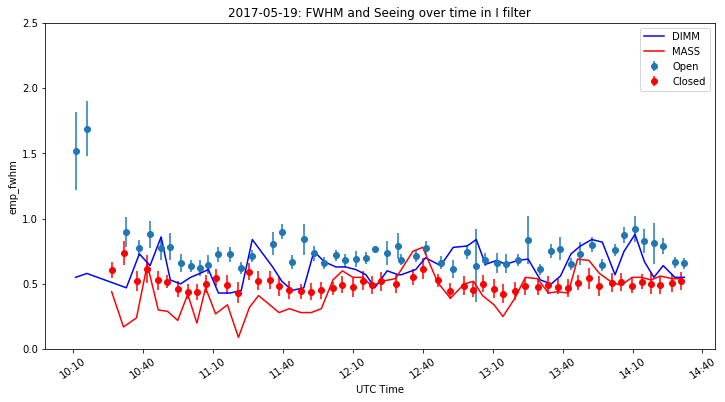

In [7]:
stats_dir = root_dir + "reduce/stats/"; plots_dir =root_dir + "reduce/plots/"
open_file = stats_dir +"stats_open_mdp.fits"; 
closedA_file = stats_dir + 'stats_closedA_mdp.fits'; closedB_file = stats_dir + 'stats_closedB_mdp.fits'
plot_stats.plot_fwhmvt_nomatch(open_file, closedA_file, 'emp_fwhm', "2017-05-19: FWHM and Seeing over time in I filter", plots_dir)

# PSF Comparisons

Average values for empirical FWHM for the whole night:

Open Loop: 0.840

Closed A : 0.553

Closed B: 0.477

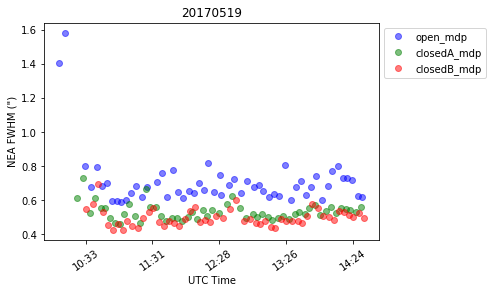

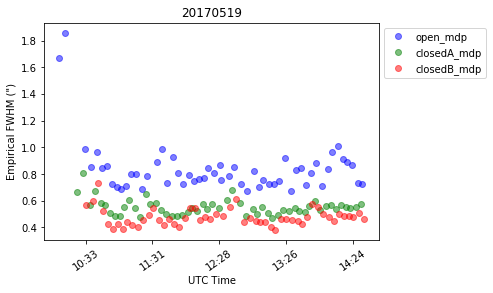

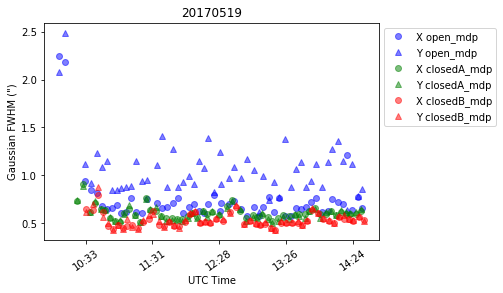

In [8]:
open_data = Table.read(open_file);
closedA_data =Table.read(closedA_file); closedB_data = Table.read(closedB_file)
plot_stats.plot_best_stats('20170519', suffixes=['open_mdp', 'closedA_mdp', 'closedB_mdp'], root_dir='/Users/fatimaabdurrahman/Desktop/Research/RUN5/')